In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

/home/user/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


ModuleNotFoundError: No module named 'tensorflow'

Found 3188 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1969s 19s/step - accuracy: 0.7413 - loss: 0.5978 - val_accuracy: 0.7632 - val_loss: 0.5457
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 356ms/step - accuracy: 0.7546 - loss: 0.5746 - val_accuracy: 0.7632 - val_loss: 0.5466
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 343ms/step - accuracy: 0.7690 - loss: 0.5378 - val_accuracy: 0.7632 - val_loss: 0.4974
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 334ms/step - accuracy: 0.7676 - loss: 0.4938 - val_accuracy: 0.7632 - val_loss: 0.4280
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 343ms/step - accuracy: 0.7605 - loss: 0.4600 - val_accuracy: 0.7632 - val_loss: 0.5377
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 343ms/step - accuracy: 0.7698 - loss: 0.4721 - val_accuracy: 0.8233 - val_loss: 0.4179
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 335ms/step - accuracy: 0.8067 - loss: 0.4085 - val_accuracy: 0.8170 - val_loss: 0.4279
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.8116 - loss: 0.4161 - val

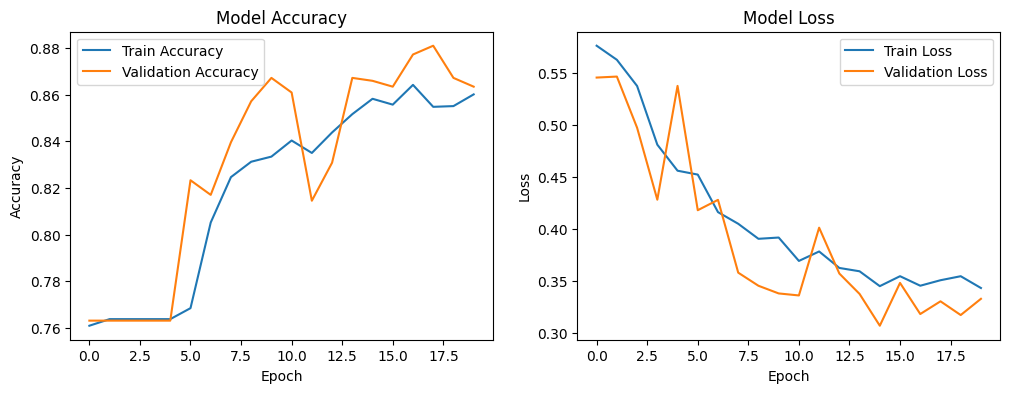

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.23      0.22      0.23       189
        star       0.76      0.77      0.77       609

    accuracy                           0.64       798
   macro avg       0.50      0.50      0.50       798
weighted avg       0.64      0.64      0.64       798

Confusion Matrix


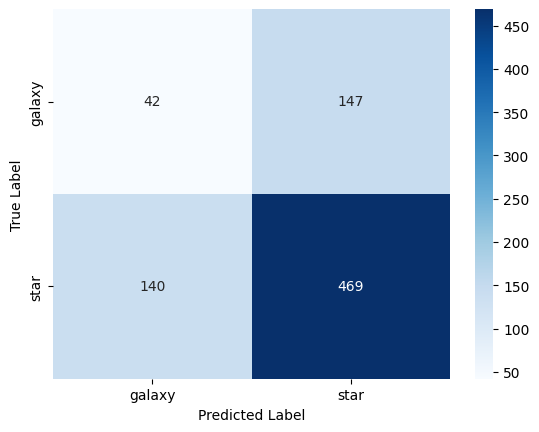

In [ ]:
# Set up directories
train_dir = '/content/drive/MyDrive/stars-galaxy classification using deep learning/dataset/train'
test_dir = '/content/drive/MyDrive/stars-galaxy classification using deep learning/dataset/test'

# Data augmentation and preprocessing
trai\n_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  color_mode='grayscale')

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate classification report and confusion matrix
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/stars-galaxy classification using deep learning/my_model.h5')